# importing required liaberaries

In [153]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder,StandardScaler
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Load dataset

In [154]:
df = pd.read_csv('Telco-Customer-Churn.txt')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Checking Missing values

In [155]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Checking data types

In [156]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [157]:
df['TotalCharges'].value_counts()

           11
20.2       11
19.75       9
19.65       8
19.9        8
           ..
2271.85     1
955.15      1
735.5       1
2531.8      1
3778.1      1
Name: TotalCharges, Length: 6531, dtype: int64

In [158]:
df[df['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


# replacing blank rows with np.NaN value

In [159]:
df['TotalCharges']=df['TotalCharges'].replace(' ',np.NaN)

In [160]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

# filling missing value

In [161]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# converting TotalCharges column data type from object to float

In [162]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [163]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

# Replacing NaN value with mean of df['TotalCharges']

In [164]:
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [165]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# EDA

# checking how many customers are using  PhoneService

Yes    6361
No      682
Name: PhoneService, dtype: int64

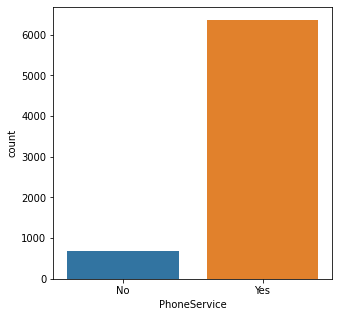

In [166]:
plt.figure(figsize=(5,5))
sns.countplot(x='PhoneService',data=df)
df['PhoneService'].value_counts()

As per above observation,6361 customers are using PhoneService however 682 customers are not using PhoneService.

# checking how many customers are using MultipleLines

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

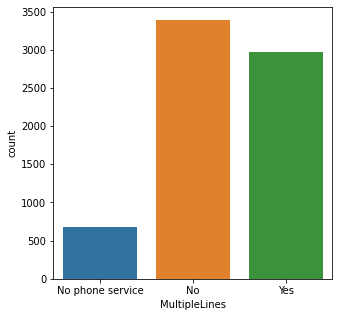

In [167]:
plt.figure(figsize=(5,5))
sns.countplot(x='MultipleLines',data=df)
df['MultipleLines'].value_counts()

As per above observation,2971 customers are using MultipleLines but 3390 customers are not using MultipleLines however there are 682 customers are not using PhoneService.

# checking how many customers are using InternetService

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

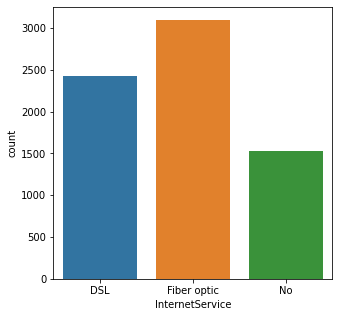

In [168]:
plt.figure(figsize=(5,5))
sns.countplot(x='InternetService',data=df)
df['InternetService'].value_counts()

As per above observation,3096 customers are using Fiber optic InternetService but 2421 customers using DSL InternetService however there are 1526 customers are not using InternetService.

# checking how many customers are using OnlineSecurity

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

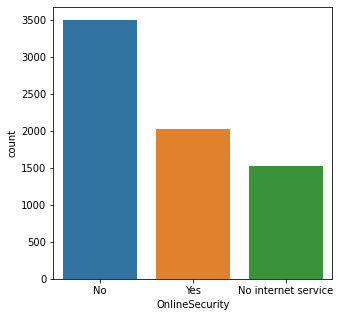

In [169]:
plt.figure(figsize=(5,5))
sns.countplot(x='OnlineSecurity',data=df)
df['OnlineSecurity'].value_counts()

As per above observation,2019 customers are using OnlineSecurity but 3498 customers are not using OnlineSecurity however there are 1526 customers are not using InternetService.

# checking how many customers are using OnlineBackup

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

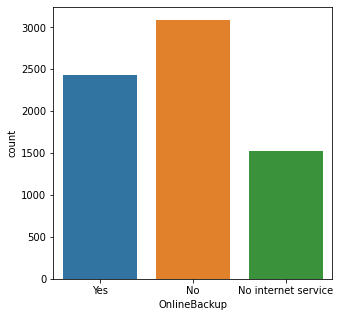

In [170]:
plt.figure(figsize=(5,5))
sns.countplot(x='OnlineBackup',data=df)
df['OnlineBackup'].value_counts()

As per above observation,2429 customers are using OnlineBackup but 3088 customers are not using OnlineBackup however there are 1526 customers are not using InternetService.

# checking how many customers are using DeviceProtection

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

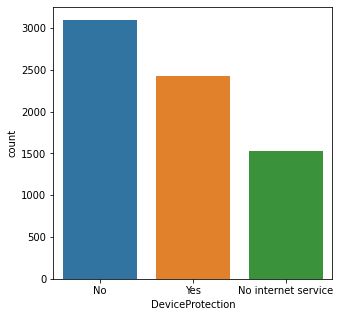

In [171]:
plt.figure(figsize=(5,5))
sns.countplot(x='DeviceProtection',data=df)
df['DeviceProtection'].value_counts()

As per above observation,2422 customers are using DeviceProtection but 3095 customers are not using DeviceProtection however there are 1526 customers are not using InternetService.

# checking how many customers are using TechSupport

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

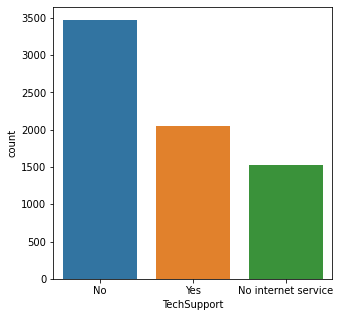

In [172]:
plt.figure(figsize=(5,5))
sns.countplot(x='TechSupport',data=df)
df['TechSupport'].value_counts()

As per above observation,2044 customers are using DeviceProtection but 3473 customers are not using DeviceProtection however there are 1526 customers are not using InternetService.

# checking how many customers are StreamingTV

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

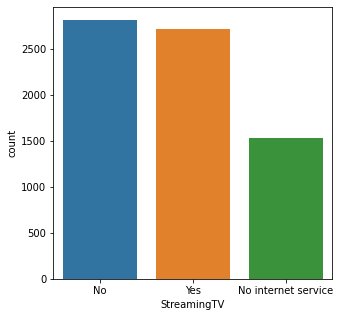

In [173]:
plt.figure(figsize=(5,5))
sns.countplot(x='StreamingTV',data=df)
df['StreamingTV'].value_counts()

As per above observation,2707 customers are using StreamingTV but 2810 customers are not using StreamingTV however there are 1526 customers are not using InternetService.

# checking how many customers are StreamingMovies

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

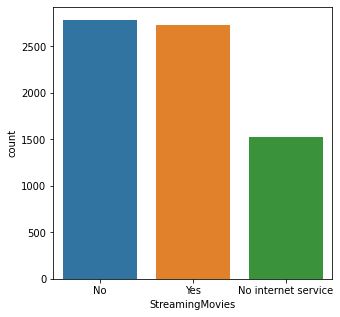

In [174]:
plt.figure(figsize=(5,5))
sns.countplot(x='StreamingMovies',data=df)
df['StreamingMovies'].value_counts()

As per above observation,2732 customers are using StreamingMovies but 2785 customers are not using StreamingMovies however there are 1526 customers are not using InternetService.

# checking how many customers are on Contract

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

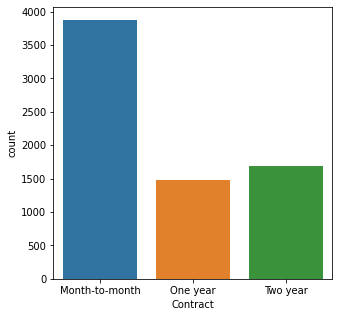

In [175]:
plt.figure(figsize=(5,5))
sns.countplot(x='Contract',data=df)
df['Contract'].value_counts()

As per above observation,3875 customers are on Month-to-month Contract and 1695 customers  are on Two year Contract and there are 1473 customers are on One year Contract.

# checking how many customers are opted for PaperlessBilling

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

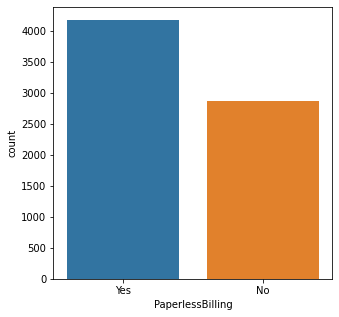

In [176]:
plt.figure(figsize=(5,5))
sns.countplot(x='PaperlessBilling',data=df)
df['PaperlessBilling'].value_counts()

As per above observation,4171 customers are opted for PaperlessBilling however 2872 customers are not opted for PaperlessBilling.

# checking how many customers are opted for PaymentMethod

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

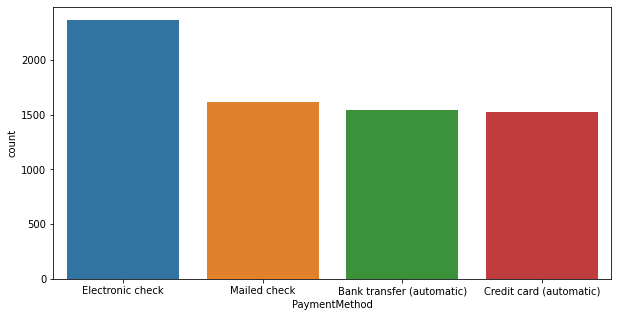

In [177]:
plt.figure(figsize=(10,5))
sns.countplot(x='PaymentMethod',data=df)
df['PaymentMethod'].value_counts()

 As per above observation, 2365 customers are opted for Electronic check PaymentMethod, 1612 customers are opted for Mailed check PaymentMethod, 1544 customers are opted for Bank transfer (automatic) PaymentMethod, 1522 customers are opted for Credit card (automatic) PaymentMethod

In [178]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

# using ordinal encoder to convert categorical data into numerical data type

In [179]:
oe = OrdinalEncoder()

In [180]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=oe.fit_transform(df[i].values.reshape(-1,1))

In [181]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375.0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,5535.0,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,...,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853.0,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0.0
7039,1525.0,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,0.0
7040,3367.0,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,346.45,0.0
7041,5934.0,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1.0


# correlation

In [182]:
df.corr()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.006288,-0.002074,-0.026729,-0.012823,0.008035,-0.006483,0.004316,-0.012407,0.013292,...,-0.006918,0.001140,-0.007777,-0.016746,0.015028,-0.001945,0.011604,-0.003916,-0.000270,-0.017447
gender,0.006288,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,...,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.002074,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,...,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102395,0.150889
Partner,-0.026729,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,...,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.318812,-0.150448
Dependents,-0.012823,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,...,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.064535,-0.164221
tenure,0.008035,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,...,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.824757,-0.352229
PhoneService,-0.006483,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,...,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.112851,0.011942
MultipleLines,0.004316,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,...,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452883,0.038037
InternetService,-0.012407,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,...,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175429,-0.047291
OnlineSecurity,0.013292,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,...,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.254308,-0.289309


<AxesSubplot:>

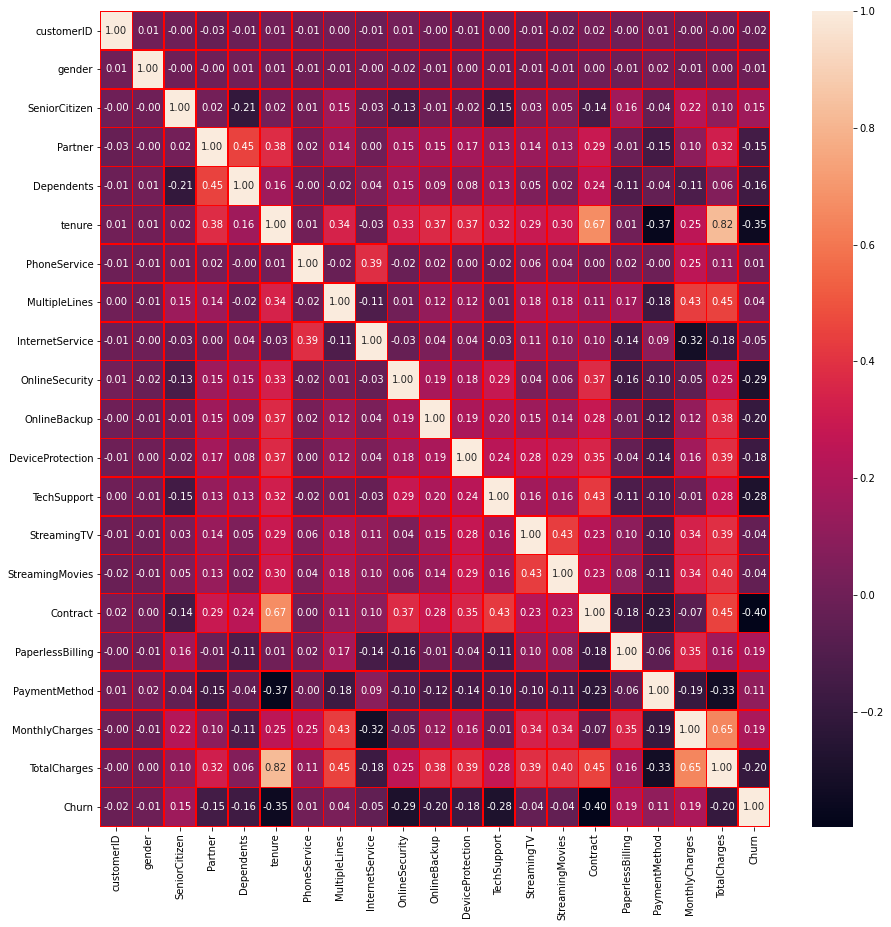

In [183]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor='r',fmt='.2f')

Findings from above observation are mentioned below:

1)customerID has 0% negetive correlation with Target column.

2)gender has 0% positive correlation with Target column.

3)SeniorCitizen has 10% positive correlation with Target column.

4)Partner has 32% positive correlation with Target column.

5)Dependents has 6% positive correlation with Target column.

6)tenure has 82% positive correlation with Target column.

7)PhoneService has 11% positive correlation with Target column.

8)MultipleLines has 45% positive correlation with Target column.

9)InternetService has 18% negetive correlation with Target column.

10)OnlineSecurity has 25% positive correlation with Target column.

11)OnlineBackup has 38% positive correlation with Target column.

12)DeviceProtection has 39% positive correlation with Target column.

13)TechSupport has 28% positive correlation with Target column.

14)StreamingTV has 39% positive correlation with Target column.

15)StreamingMovies has 40% positive correlation with Target column.

16)Contract has 45% positive correlation with Target column.

17)PaperlessBilling has 16% positive correlation with Target column.

18)PaymentMethod has 33% negetive correlation with Target column.

19)MonthlyCharges has 65% positive correlation with Target column.

20)Churn has 20% negetive correlation with Target column.
 

# Checking Outlier for int & float data type

<AxesSubplot:>

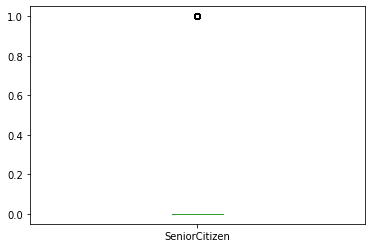

In [184]:
df['SeniorCitizen'].plot.box()

As per above observation, there is an outlier

<AxesSubplot:>

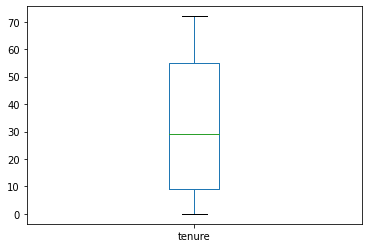

In [185]:
df['tenure'].plot.box()

As per above observation, there is no outlier

<AxesSubplot:>

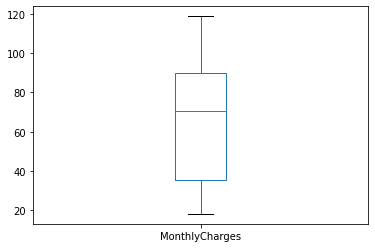

In [186]:
df['MonthlyCharges'].plot.box()

As per above observation, there is no outlier

<AxesSubplot:>

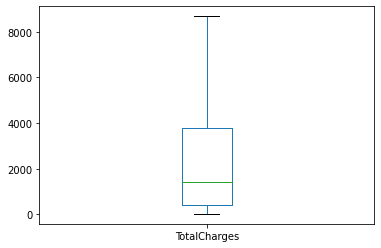

In [187]:
df['TotalCharges'].plot.box()

As per above observation, there is no outlier

# checking Skewness for int & float data type

In [188]:
df.skew()

customerID          0.000000
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.962394
Churn               1.063031
dtype: float64

Findings skewed data from above observation are mention below

SeniorCitizen===== 1.833633

PhoneService===== -2.727153

Dependents ======= 0.875199

Contract ======= 0.630959

TotalCharges====== 0.962394

Churn ======= 1.063031

All columns are categorical by nature except TotalCharges. But TotalCharges column is our Target column hence not removing skewness from it.

# outlier removal

In [189]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape

(7043, 21)

In [190]:
print(np.where(z>3))

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
        114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
        215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
        278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
        387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
        544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
        677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
        829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
        934,  941,  943,  960,  973, 1011, 1018, 1037, 1050, 1051, 1053,
       1072, 1110, 1119, 1122, 1144, 1146, 1150, 1161, 1169, 1182, 1204,
       1221, 1225, 1242, 1255, 1257, 1271, 1278, 1298, 1311, 1326, 1331,
       1333, 1334, 1340, 1349, 1352, 1365, 1379, 1402, 1407, 1416, 1452,
       1479, 1480, 1481, 1500, 1506, 1513, 1519, 1560, 1562, 1581, 1584,
       1614, 1620, 1634, 1637, 1652, 1689, 1692, 1

In [191]:
df_new = df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(7043, 21)
(6361, 21)


# % of data loss after removing outlier

In [192]:
loss = (7043-6361)/7043*100
print(loss)

9.683373562402386


As per above observation,lossing 9.68% of total data after removing outlier

# Dividing dataset into features and vector where x=features,y=vector

In [193]:
x = df_new.drop('TotalCharges',axis=1)

In [194]:
y = df_new['TotalCharges']

# Trying to get best random_state

In [195]:
maxAcc=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    mod=LinearRegression()
    mod.fit(x_train,y_train)
    pred = mod.predict(x_test)
    acc = r2_score(pred,y_test)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print("Best r2_score",maxAcc,"on random_state",maxRS)        

Best r2_score 0.9127864397095209 on random_state 140


In [196]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=140)

# Data Normalization

In [197]:
sc = StandardScaler()

In [198]:
x_train = sc.fit_transform(x_train)

In [199]:
x_test = sc.transform(x_test)

# Linear Regression

In [200]:
lr = LinearRegression()
lr.fit(x_train,y_train)
lr_pd = lr.predict(x_test)
r2_score(lr_pd,y_test)

0.912786439709521

# Regularization Technique

In [201]:
rd = Ridge()
rd.fit(x_train,y_train)
rd_pd = rd.predict(x_test)
r2_score(rd_pd,y_test)

0.9127603683091412

In [202]:
ls = Lasso()
ls.fit(x_train,y_train)
ls_pd = ls.predict(x_test)
r2_score(ls_pd,y_test)

0.9126374510787992

In [203]:
el = ElasticNet()
el.fit(x_train,y_train)
el_pd = el.predict(x_test)
r2_score(el_pd,y_test)

0.7665017245883217

# Ensemble Technique

# Random Forest Regressor

In [204]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr_pd = rfr.predict(x_test)
r2_score(rfr_pd,y_test)

0.9988027612428269

# Decision Tree Regressor

In [205]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr_pd = dtr.predict(x_test)
r2_score(dtr_pd,y_test)

0.9970902825377232

# cross_validation

In [206]:
print(cross_val_score(lr,x,y,cv=5).mean())

0.909338436511462


In [207]:
print(cross_val_score(rd,x,y,cv=5).mean())

0.9093387199541818


In [208]:
print(cross_val_score(ls,x,y,cv=5).mean())

0.9093436959882973


In [209]:
print(cross_val_score(el,x,y,cv=5).mean())

0.9069877172971793


In [210]:
print(cross_val_score(rfr,x,y,cv=5).mean())

0.998743989818592


In [211]:
print(cross_val_score(dtr,x,y,cv=5).mean())

0.9971842400608301


As per above observation Random Forest Regressor is doing good because the difference between r2_score and cross_val_score is lesser in comparison to other model.

# Hyper parameter Tuning

In [212]:
Parameters = {'criterion':['squared_error','absolute_error','poisson'],
              'max_depth':np.arange(2,10),
              'max_features':['auto','sqrt','log2'],
              'random_state':[140]}

In [213]:
gsc = GridSearchCV(estimator=rfr,param_grid=Parameters,cv=5)

In [214]:
gsc.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'random_state': [140]})

In [215]:
gsc.best_params_

{'criterion': 'poisson',
 'max_depth': 9,
 'max_features': 'sqrt',
 'random_state': 140}

# Final model with best parameter

In [218]:
Final_model = RandomForestRegressor(criterion='poisson',max_depth=9,max_features='sqrt',random_state=140)
Final_model.fit(x_train,y_train)
churn = Final_model.predict(x_test)
r2_score(churn,y_test)

0.4433616424542779

# Checking how my model is performing

Text(0.5, 1.0, 'Linear Regression')

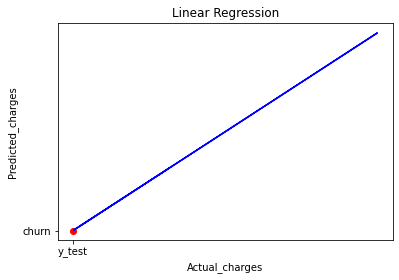

In [219]:
plt.scatter(x='y_test',y='churn',Color='r')
plt.plot(y_test,y_test,Color='b')
plt.xlabel('Actual_charges')
plt.ylabel('Predicted_charges')
plt.title('Linear Regression')

In [220]:
a=np.array(y_test)
predicted = np.array(rfr.predict(x_test))
df_com = pd.DataFrame({'Original':a,'predicted':predicted},index=range(len(a)))
df_com

,Original,predicted
0,184.40,198.3060
1,769.10,734.1625
2,159.35,142.3980
3,198.10,225.8155
4,1614.05,1741.5165
...,...,...
1268,3605.60,3626.6305
1269,819.40,826.4980
1270,2715.30,2725.4720
1271,1423.35,1354.5785


# Saving Model

In [221]:
import joblib
joblib.dump(Final_model,"Churn_final_model")

['Churn_final_model']